<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Autoregressive-(AR)-Model" data-toc-modified-id="Autoregressive-(AR)-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Autoregressive (AR) Model</a></span><ul class="toc-item"><li><span><a href="#Properties" data-toc-modified-id="Properties-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Properties</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Example</a></span></li></ul></li><li><span><a href="#Moving-Average-(MA)-Model" data-toc-modified-id="Moving-Average-(MA)-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Moving Average (MA) Model</a></span><ul class="toc-item"><li><span><a href="#Example" data-toc-modified-id="Example-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Example</a></span></li></ul></li><li><span><a href="#ARMA-Model" data-toc-modified-id="ARMA-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ARMA Model</a></span><ul class="toc-item"><li><span><a href="#Higher-Order" data-toc-modified-id="Higher-Order-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Higher Order</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(13)

# Autoregressive (AR) Model

## Properties

Formula: $Y(t) = \mu + \phi * Y(t-1)+\epsilon(t)$

> $\phi = 0$: simply the white noise model (mean of $\mu$)
>
> $\phi \lt 0$: oscillates
>
> $\phi \gt 0$: previous points correlate with past (**autocorrelated**)

## Example

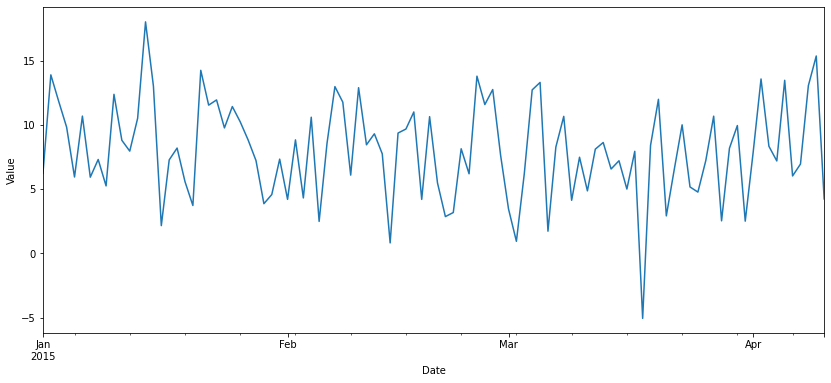

In [8]:
avg = 0
std = 4
n_pts = 100


mu = 7
phi = 0.1
# phi = 0.5
# phi = 0.9
# phi = -0.1
# phi = -0.5
# phi = -0.9

# Dates & white noise (epsilon)
date_vals = pd.date_range(start='1/1/2015', periods=n_pts)
epsilon = np.random.normal(avg,std,n_pts)

#
vals = []
y = 0
for e in epsilon:
    y = y * phi  + e + mu
    vals.append(y)
    
    
time_series =  pd.Series(vals, index=date_vals)

# Plot out the model
ax = time_series.plot(figsize=(14,6))
ax.set_ylabel("Value")
ax.set_xlabel("Date")
plt.show()
# epsilon

In [5]:
a = [1]*5
a = a * np.linspace(1,2,5)
a

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

# Moving Average (MA) Model

Formula: $Y(t) = \mu + \theta * \epsilon(t-1)+\epsilon(t)$

> $\theta = 0$: simply the white noise model (mean of $\mu$)
>
> $\theta \lt 0$: oscillates
>
> $\theta \gt 0$: previous points correlate with past (**autocorrelated**)

## Example

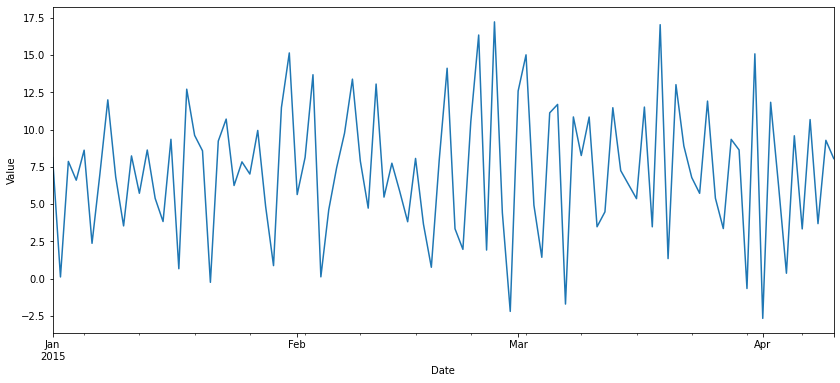

In [12]:
avg = 0
std = 4
n_pts = 100


mu = 7
# theta = 0.1
# theta = 0.5
# theta = 0.9
# theta = -0.1
theta = -0.5
# theta = -0.9

# Dates & white noise (epsilon)
date_vals = pd.date_range(start='1/1/2015', periods=n_pts)
epsilon = np.random.normal(avg,std,n_pts+1)

#
vals = []
y = 0
for i in range(len(epsilon)-1):
    y = epsilon[i] * theta  + epsilon[i+1] + mu
    vals.append(y)
    
    
time_series =  pd.Series(vals, index=date_vals)

# Plot out the model
ax = time_series.plot(figsize=(14,6))
ax.set_ylabel("Value")
ax.set_xlabel("Date")
plt.show()

# ARMA Model

Combine them together; can have both regression on past values (AR) and previous errors affect future errors (MA)

Formula: $Y(t) = \mu + \epsilon(t) + \phi * Y(t-1) +  \theta * \epsilon(t-1)$


## Higher Order

ARMA(2,1) yields

$$Y(t) = \mu + \epsilon(t) + \phi_2 * Y(t-2) + \phi_1 * Y(t-1) +  \theta * \epsilon(t-1)$$